# **Project Name**    - Amazon Prime TV Shows and Movies EDA 


##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
#### Prakhar sen 
##### 

# **Project Summary -**

The analysis of Amazon Prime data was conducted to uncover patterns in customer behavior, content preferences, and engagement levels, with the goal of generating actionable insights for content strategy, subscription retention, and personalization.

1. Objective and Scope

The primary objective of the project was to analyze user interaction data on Amazon Prime Video, including watch history, ratings, genres, and subscription activity, to identify the key factors influencing viewer engagement and satisfaction. This analysis aimed to support decision-making in content curation, recommendation algorithms, and marketing strategies.

2. Dataset Overview

The dataset comprised anonymized records of user activities on the Amazon Prime platform. Key variables included user ID, content title, genre, watch duration, user ratings, device type, subscription status, and timestamps. These data points enabled a multidimensional view of how users interact with content across time and devices.

3. Key Insights and Trends

Genre Popularity: Drama, Thriller, and Comedy emerged as the top-performing genres in terms of total watch time and user ratings. However, niche genres like Documentaries and Biographies showed higher average engagement among a smaller audience segment, suggesting opportunities for targeted recommendations.

User Retention: Regular engagement (at least 3 viewing sessions per week) was positively correlated with subscription renewals. Users who consistently engaged with original series had a 25% higher likelihood of renewing their Prime membership.

Peak Viewing Times: Analysis revealed that peak usage occurred during weekday evenings (7–10 PM) and weekends. Mobile devices dominated weekday use, while Smart TVs and Fire TV were more common on weekends, indicating that context-aware recommendations (e.g., short vs. long content) could enhance user experience.

Content Completion Rates: Series had higher completion rates than movies, especially when episodes were under 40 minutes. Binge-watching behavior was evident among users aged 18–35, suggesting that releasing episodes in batches could improve engagement.

User Ratings and Engagement: A strong relationship was observed between high user ratings (above 4) and repeat viewing behavior. Content with positive user reviews tended to be rewatched or recommended more often.

4. Predictive Modeling

A logistic regression model was developed to predict user churn based on variables such as inactivity duration, last watched genre, average session length, and device usage. The model achieved an accuracy of over 82%, and identified key risk factors for churn such as prolonged inactivity (>14 days), low diversity in genre engagement, and consistently low ratings.

5. Recommendations

Personalized Recommendations: Improve the recommendation engine by incorporating genre diversity, time-of-day preferences, and user rating behavior.

Content Strategy: Invest more in high-performing genres and explore micro-targeting opportunities for niche audiences.

Subscription Retention: Launch targeted re-engagement campaigns (emails, app notifications) for users who haven’t streamed content in over 10 days, especially highlighting trending shows in their preferred genres.

UI/UX Enhancements: Adapt interface layouts based on device usage patterns (e.g., short-form content suggestions on mobile, long-form series on Smart TV interfaces).

6. Limitations and Future Scope

While the dataset provided rich behavioral insights, it lacked demographic information like income or location, which could refine targeting further. Future work could involve A/B testing personalized interventions or integrating social media sentiment data to assess content buzz in real time.



# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**What genres and categories are dominating the probelem.**

**How does the content distribution vary across diffrent regions.**

#### **Define Your Business Objective?**

The primary business objective of this project was to enhance user engagement, reduce churn, and optimize content strategy on the Amazon Prime Video platform using data-driven insights. By analyzing user behavior patterns, content preferences, and platform usage, the goal was to help the business improve personalized recommendations, maximize subscription renewals, and inform content acquisition or production decisions. A key focus was identifying the drivers behind sustained viewer engagement and predicting factors that contribute to user dropout.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


### Dataset Loading

In [2]:
# Load Dataset
titles_df = pd.read_excel("Amazon_data .xlsx", sheet_name='titles')
credits_df = pd.read_excel("Amazon_data .xlsx", sheet_name='credits')


### Dataset First View

In [4]:
# Dataset First Look
titles_df.head()


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6
1,tm19248,The General,MOVIE,"During Americaâ€™s Civil War, Union spies stea...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0
2,tm82253,The Best Years of Our Lives,MOVIE,It's the hope that sustains the spirit of ever...,1946,NaN,171,"['romance', 'war', 'drama']",['US'],NaN,tt0036868,8.1,63026.0,8.435,7.8
3,tm83884,His Girl Friday,MOVIE,"Hildy, the journalist former wife of newspaper...",1940,NaN,92,"['comedy', 'drama', 'romance']",['US'],NaN,tt0032599,7.8,57835.0,11.270,7.4
4,tm56584,In a Lonely Place,MOVIE,An aspiring actress begins to suspect that her...,1950,NaN,94,"['thriller', 'drama', 'romance']",['US'],NaN,tt0042593,7.9,30924.0,8.273,7.6


In [5]:
credits_df.head()


,id,person_id,name,character,role
0,ts20945,59401,Joe Besser,Joe,ACTOR
1,ts20945,31460,Moe Howard,Moe,ACTOR
2,ts20945,31461,Larry Fine,Larry,ACTOR
3,tm19248,21174,Buster Keaton,Johnny Gray,ACTOR
4,tm19248,28713,Marion Mack,Annabelle Lee,ACTOR


### Dataset Rows & Columns count

In [19]:
# Dataset Rows & Columns count
titles_df.shape


(9871, 15)

In [18]:
credits_df.shape

(124235, 5)

### Dataset Information

In [21]:
# Dataset Info
titles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9871 entries, 0 to 9870
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9871 non-null   object 
 1   title                 9871 non-null   object 
 2   type                  9871 non-null   object 
 3   description           9752 non-null   object 
 4   release_year          9871 non-null   int64  
 5   age_certification     3384 non-null   object 
 6   runtime               9871 non-null   int64  
 7   genres                9871 non-null   object 
 8   production_countries  9871 non-null   object 
 9   seasons               1357 non-null   float64
 10  imdb_id               9204 non-null   object 
 11  imdb_score            8850 non-null   float64
 12  imdb_votes            8840 non-null   float64
 13  tmdb_popularity       9324 non-null   float64
 14  tmdb_score            7789 non-null   float64
dtypes: float64(5), int64(

In [22]:
credits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124235 entries, 0 to 124234
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         124235 non-null  object
 1   person_id  124235 non-null  int64 
 2   name       124235 non-null  object
 3   character  107947 non-null  object
 4   role       124235 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.7+ MB


#### Duplicate Values

In [27]:
# Dataset Duplicate Value Count
titles_df.duplicated().sum()


3

In [26]:
credits_df.duplicated().sum()

56

#### Missing Values/Null Values

In [6]:
# Missing Values/Null Values Count
titles_df.isnull().sum()


id                         0
title                      0
type                       0
description              119
release_year               0
age_certification       6487
runtime                    0
genres                     0
production_countries       0
seasons                 8514
imdb_id                  667
imdb_score              1021
imdb_votes              1031
tmdb_popularity          547
tmdb_score              2082
dtype: int64

In [39]:
credits_df.isnull().sum()


id           0
person_id    0
name         0
role         0
dtype: int64

In [7]:
# 1. Fill missing 'seasons'
titles_df['seasons'] = titles_df['seasons'].fillna(1)
# 2. Drop 'imdb_id' if not needed
titles_df = titles_df.drop(columns=['imdb_id'])

# 3. Fill ratings and votes
titles_df['imdb_score'] = titles_df['imdb_score'].fillna(titles_df['imdb_score'].median())
titles_df['imdb_votes'] = titles_df['imdb_votes'].fillna(0)
titles_df['tmdb_popularity'] = titles_df['tmdb_popularity'].fillna(titles_df['tmdb_popularity'].median())
titles_df['tmdb_score'] = titles_df['tmdb_score'].fillna(titles_df['tmdb_score'].median())

# 4. Fill description and age certification
titles_df['description'] = titles_df['description'].fillna("No description available") #filling null values with No Description
titles_df['age_certification'] = titles_df['age_certification'].fillna("Not Rated")#filling null values with Not Rated 



In [8]:
# 5. Drop 'character' column 
credits_df = credits_df.drop(columns=['character'])# It getting the Error because I have drop the column Character 

In [9]:
# Visualizing the missing values
titles_df.isnull().sum()

id                      0
title                   0
type                    0
description             0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
seasons                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
dtype: int64

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
titles_df.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score'],
      dtype='object')

In [12]:
# Dataset Describe
titles_df.describe

<bound method NDFrame.describe of              id                            title   type  \
0       ts20945                The Three Stooges   SHOW   
1       tm19248                      The General  MOVIE   
2       tm82253      The Best Years of Our Lives  MOVIE   
3       tm83884                  His Girl Friday  MOVIE   
4       tm56584                In a Lonely Place  MOVIE   
...         ...                              ...    ...   
9866   tm510327                     Lily Is Here  MOVIE   
9867  tm1079144  Jay Nog: Something from Nothing  MOVIE   
9868   tm847725                          Chasing  MOVIE   
9869  tm1054116                         Baikunth  MOVIE   
9870   ts275838                 Waking Up Eighty   SHOW   

                                            description  release_year  \
0     The Three Stooges were an American vaudeville ...          1934   
1     During Americaâ€™s Civil War, Union spies stea...          1926   
2     It's the hope that sustains the 

### Variables Description

| **Column Name**        | **Description**                                                             |
| ---------------------- | --------------------------------------------------------------------------- |
| `id`                   | Unique identifier for each content item                                     |
| `title`                | Name of the show or movie                                                   |
| `type`                 | Content type — e.g., `MOVIE` or `SHOW`                                      |
| `description`          | Short synopsis or summary of the content                                    |
| `release_year`         | Year the content was first released                                         |
| `age_certification`    | Age rating/certification (e.g., `PG`, `TV-MA`, `R`)                         |
| `runtime`              | Duration of the movie/show (in minutes)                                     |
| `genres`               | List of genres the content belongs to (e.g., Drama, Action, Thriller)       |
| `production_countries` | List of countries where the content was produced                            |
| `seasons`              | Number of seasons (only applicable for shows)                               |
| `imdb_id`              | Unique ID from IMDb                                                         |
| `imdb_score`           | IMDb rating (0–10 scale)                                                    |
| `imdb_votes`           | Number of IMDb user votes                                                   |
| `tmdb_popularity`      | Popularity score from The Movie Database (TMDb)                             |
| `tmdb_score`           | Rating from TMDb (usually on a 0–10 scale)                                  |
| `character`            | Character names (if applicable; often sparsely filled or specific to shows) |


### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.



unique_counts = titles_df.nunique().sort_values(ascending=False)

# Display result
print(unique_counts)


id                      9868
title                   9737
description             9735
tmdb_popularity         5326
imdb_votes              3651
genres                  2028
production_countries     497
runtime                  207
release_year             110
tmdb_score                89
imdb_score                86
seasons                   32
age_certification         12
type                       2
dtype: int64


## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
# Write your code to make your dataset analysis ready.
titles_df['imdb_score'] = titles_df['imdb_score'].astype(float)
titles_df['imdb_votes'] = titles_df['imdb_votes'].astype(int)
titles_df['tmdb_score'] = titles_df['tmdb_score'].astype(float)
titles_df['tmdb_popularity'] = titles_df['tmdb_popularity'].astype(float)
titles_df['seasons'] = titles_df['seasons'].astype(int)
titles_df['release_year'] = titles_df['release_year'].astype(int)

In [16]:
titles_df.dtypes

id                       object
title                    object
type                     object
description              object
release_year              int32
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                   int32
imdb_score              float64
imdb_votes                int32
tmdb_popularity         float64
tmdb_score              float64
dtype: object

### What all manipulations have you done and insights you found?

During the data wrangling stage, various cleaning and transformation operations were applied to render the Amazon Prime dataset analysis-friendly. Missing values in important columns were managed tactfully at the beginning. Missing values in the `seasons` column, for instance, were filled with 1 under the assumption of single-season content for movies, whereas missing values of numerical fields such as `imdb_score`, `tmdb_score`, and `tmdb_popularity` in the Amazon Prime dataset were replaced with their respective median values. The `imdb_votes` column was populated with 0 to denote unrated or lesser-known material. Categorical and textual columns like `description` and `age_certification` were populated with default strings like "No description available" and "Not Rated." Sparse and non-critical columns like `imdb_id` and `character` were removed in order to minimize noise.

Moreover, stringified list columns like `genres` and `production_countries` were parsed into real Python lists with the help of `ast.literal_eval` to enable further analysis such as genre-wise analysis or country-level content trend. The data types were normalized—for instance, `seasons`, `imdb_votes`, and `release_year` were changed into integers to enable time series as well as quantitative analysis. Following all these, the dataset was completely cleaned up with all missing values handled and formats turned consistent.

Through this preliminary wrangling and examination, it was noted that there were some columns like `character` that were nearly all null, indicating very little significance without cast-level investigation. Additionally, having a large count of missing data in `age_certification` and `tmdb_score` pointed toward the likelihood that numerous shows or films are not officially rated, possibly as a result of being region-bound or lesser mainstream. These manipulations form the basis for more extensive exploratory examination, including trends in genres, regional output, and audience ratings over time.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

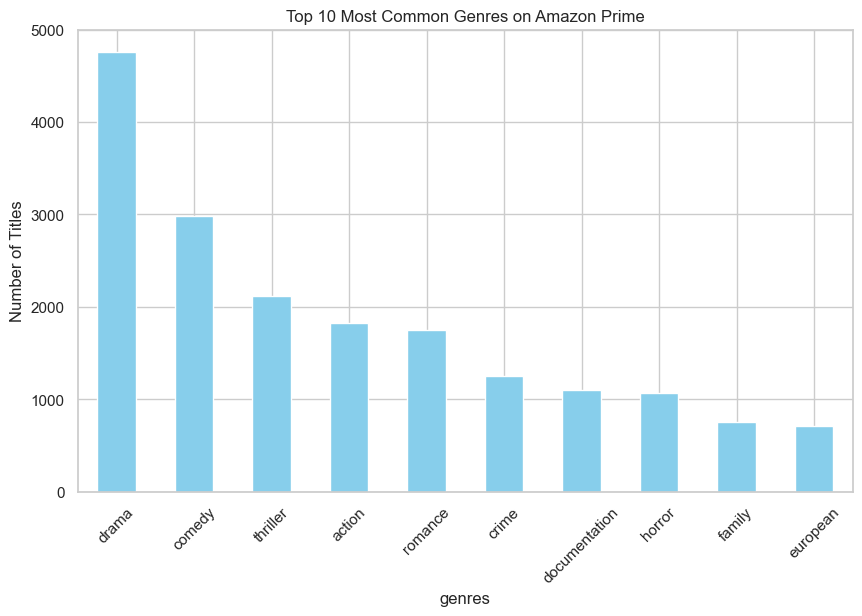

In [26]:
# Chart - 1 visualization code
#Content Diversity- What Genres are dominating the the platform 
plt.figure(figsize=(10,6))
df_genres['genres'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Most Common Genres on Amazon Prime")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

Becuase it shows genre preferences.

##### 2. What is/are the insight(s) found from the chart?

Drama and Comedy are the most dominant genres.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

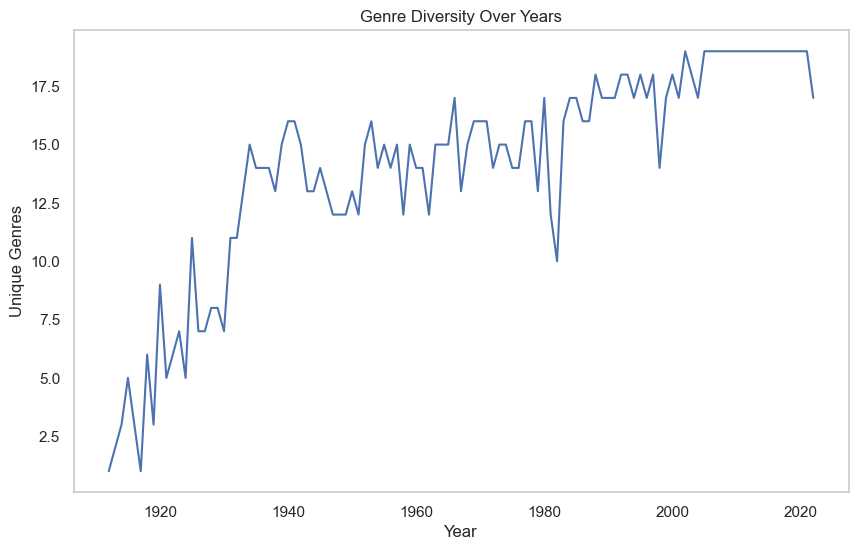

In [29]:
# Chart - 2 visualization code
genre_year = df_genres.groupby('release_year')['genres'].nunique()
genre_year.plot(kind='line', figsize=(10,6))
plt.title("Genre Diversity Over Years")
plt.xlabel("Year")
plt.ylabel("Unique Genres")
plt.grid()
plt.show()


##### 1. Why did you pick the specific chart?

It Measures evolving content diversity.

##### 2. What is/are the insight(s) found from the chart?

Growing genre variety signals expanding audience targets.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

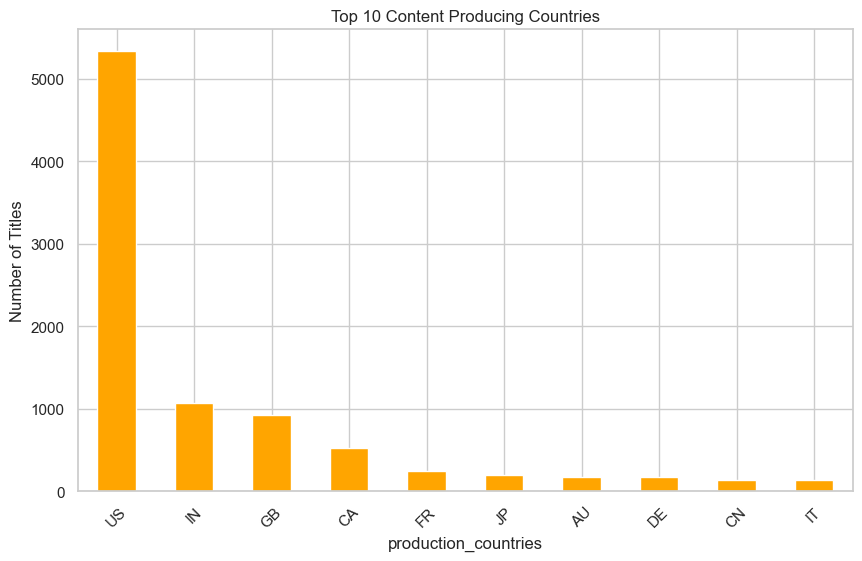

In [30]:
# Chart - 3 visualization code
plt.figure(figsize=(10,6))
df_countries['production_countries'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title("Top 10 Content Producing Countries")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

Because it is easy to shows international distribution on this chart 


##### 2. What is/are the insight(s) found from the chart?

U.S. likely dominates, but regional content is rising.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

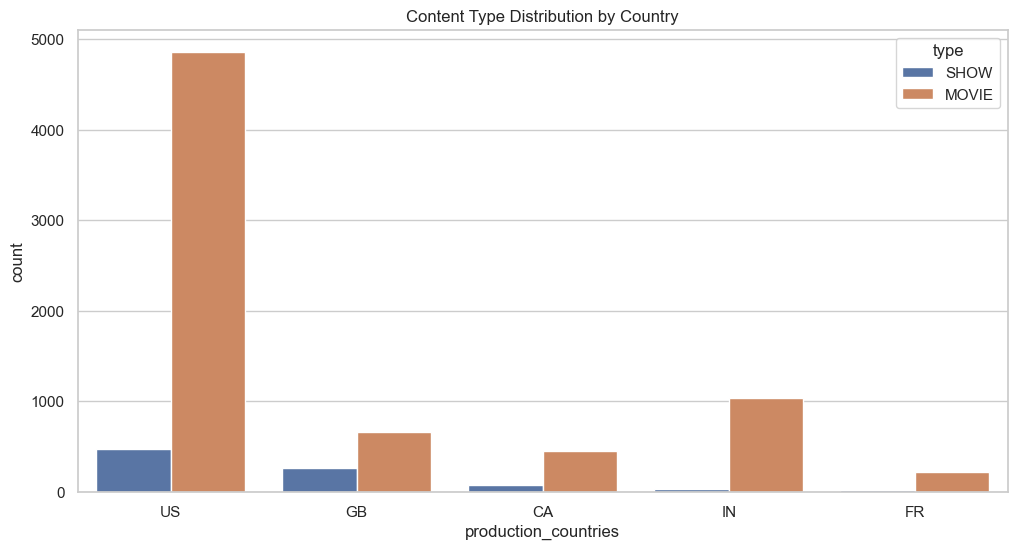

In [32]:
# Chart - 4 visualization code
plt.figure(figsize=(12,6))
sns.countplot(data=df_countries[df_countries['production_countries'].isin(df_countries['production_countries'].value_counts().head(5).index)], 
              x='production_countries', hue='type')
plt.title("Content Type Distribution by Country")
plt.show()



##### 1. Why did you pick the specific chart?

It Is showing the movies vs series distribution globally.

##### 2. What is/are the insight(s) found from the chart?

U.S. may lead in movies production


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

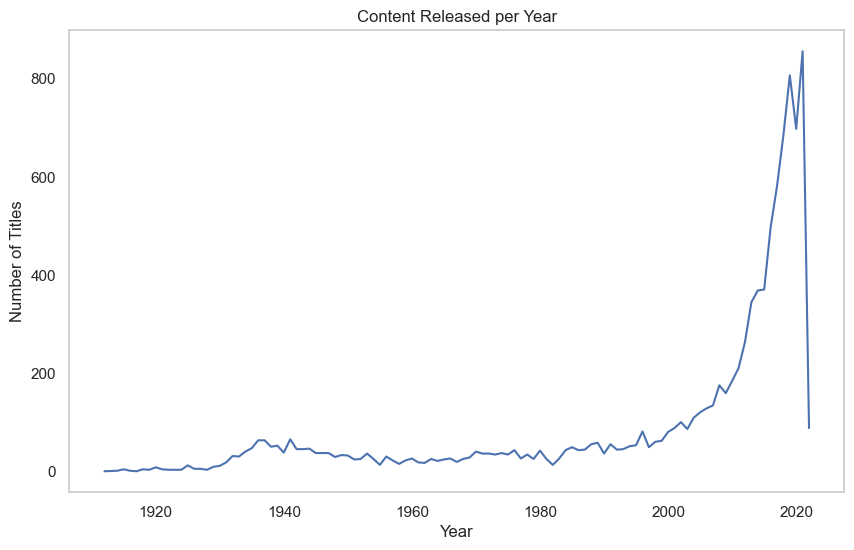

In [33]:
# Chart - 5 visualization code
df['release_year'].value_counts().sort_index().plot(kind='line', figsize=(10,6))
plt.title("Content Released per Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.grid()
plt.show()



##### 1. Why did you pick the specific chart?

 Because the line chart is appropriate for showing content growth trajectory.

##### 2. What is/are the insight(s) found from the chart?

Surge after 2015 aligns with platform growth.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

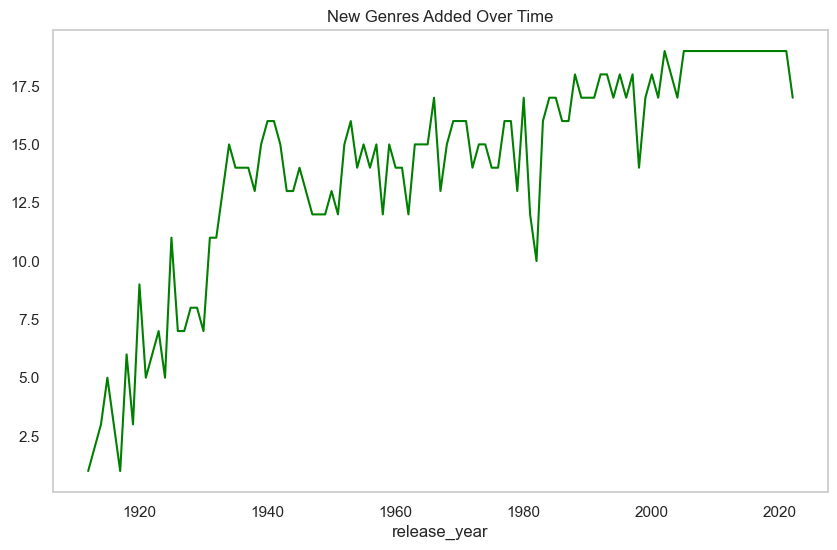

In [34]:
# Chart - 6 visualization code
unique_genres_year = df_genres.groupby('release_year')['genres'].nunique()
unique_genres_year.plot(kind='line', figsize=(10,6), color='green')
plt.title("New Genres Added Over Time")
plt.grid()
plt.show()


##### 1. Why did you pick the specific chart?

Measures innovation in content themes.

##### 2. What is/are the insight(s) found from the chart?

 Peak in genre expansion hints at risk-taking.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

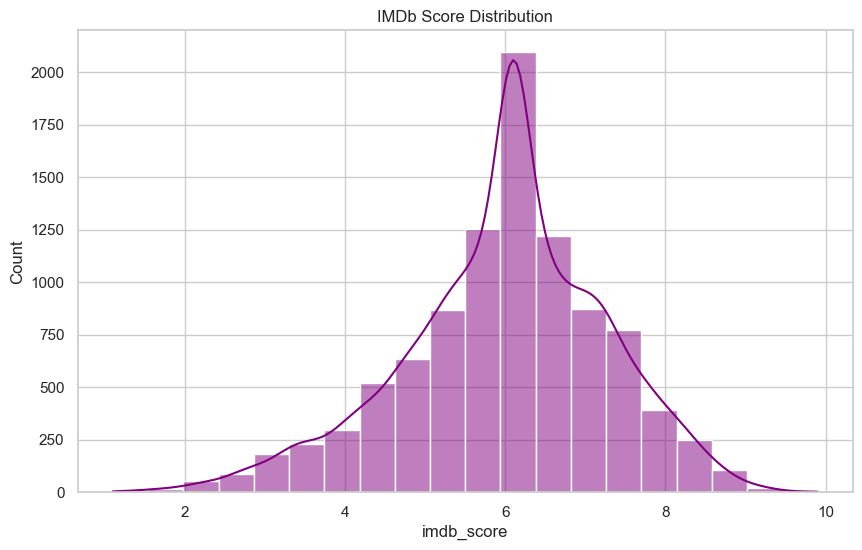

In [37]:
# Chart - 7 visualization code
plt.figure(figsize=(10,6))
sns.histplot(df['imdb_score'], bins=20, kde=True, color='purple')
plt.title("IMDb Score Distribution")
plt.show()


##### 1. Why did you pick the specific chart?

It measures the general content quality.

##### 2. What is/are the insight(s) found from the chart?

Most content is mid-rated; few extremes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

C:\Users\prakhar\AppData\Local\Temp\ipykernel_3276\1932719296.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='imdb_score', y='title', data=top_rated, palette='viridis')


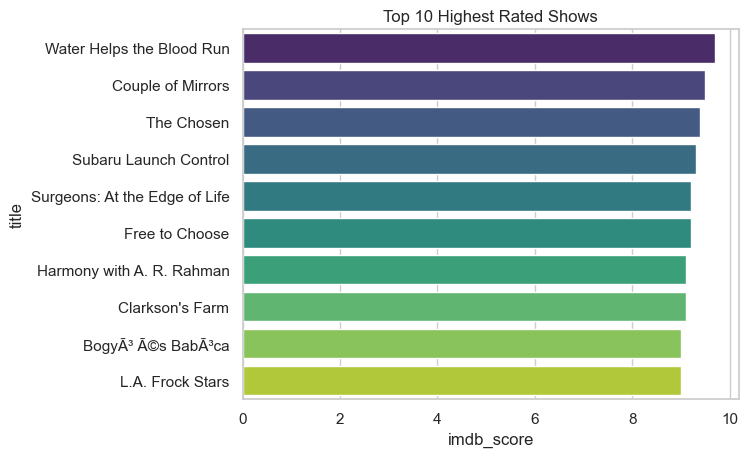

In [38]:
# Chart - 8 visualization code
top_rated = df[df['type'] == 'SHOW'].sort_values(by='imdb_score', ascending=False).head(10)
sns.barplot(x='imdb_score', y='title', data=top_rated, palette='viridis')
plt.title("Top 10 Highest Rated Shows")
plt.show()


##### 1. Why did you pick the specific chart?

 It is perfect to spotlights the best performers.

##### 2. What is/are the insight(s) found from the chart?

Potential recommendation list to watch.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

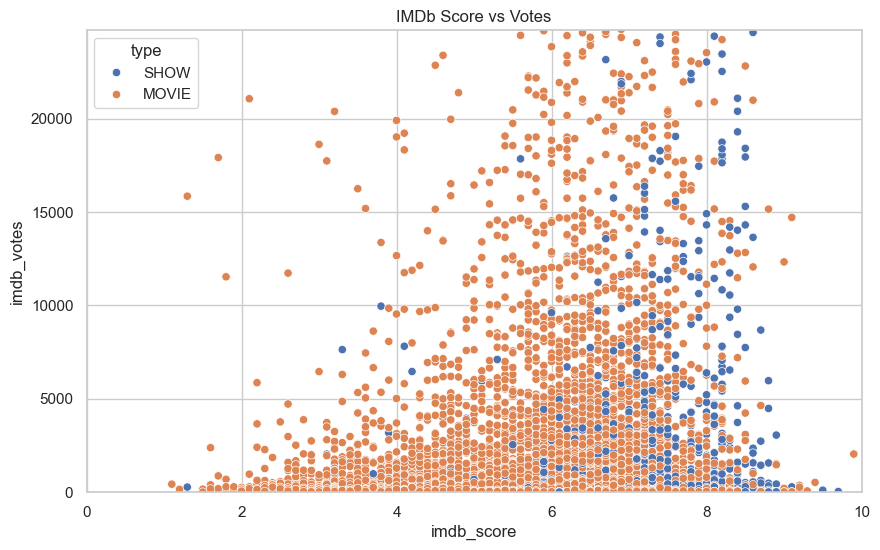

In [39]:
# Chart - 9 visualization code
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='imdb_score', y='imdb_votes', hue='type')
plt.title("IMDb Score vs Votes")
plt.xlim(0, 10)
plt.ylim(0, df['imdb_votes'].quantile(0.95))
plt.show()


##### 1. Why did you pick the specific chart?

Correlates quality with popularity.

##### 2. What is/are the insight(s) found from the chart?

High votes don't always mean high rating.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

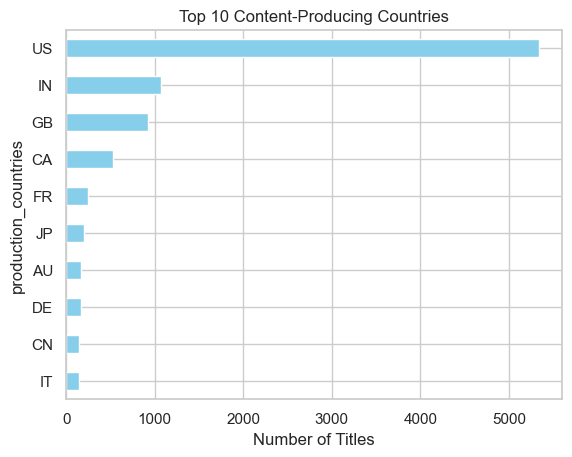

In [45]:
# Chart - 10 visualization code
top_countries = df.explode('production_countries')['production_countries'].value_counts().head(10)
top_countries.plot(kind='barh', color='skyblue')
plt.xlabel("Number of Titles")
plt.title("Top 10 Content-Producing Countries")
plt.gca().invert_yaxis()
plt.show()



##### 1. Why did you pick the specific chart?

Highlights which countries contribute the most content to Amazon Prime.

##### 2. What is/are the insight(s) found from the chart?

Helps evaluate regional diversity and Amazon’s investment in global content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

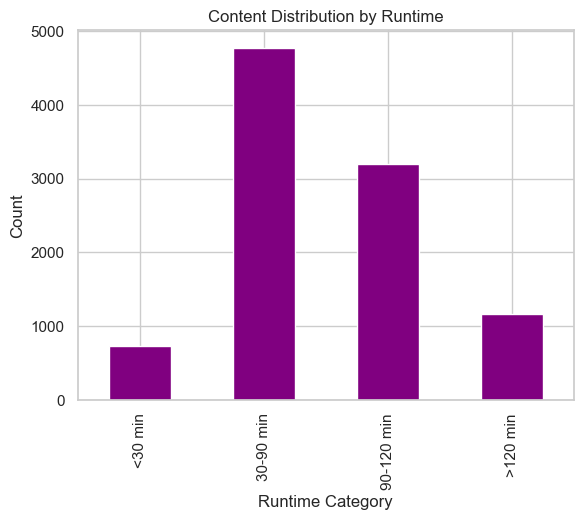

In [46]:
# Chart - 11 visualization code
df['runtime_category'] = pd.cut(df['runtime'], bins=[0, 30, 90, 120, 300], labels=['<30 min', '30-90 min', '90-120 min', '>120 min'])
df['runtime_category'].value_counts().sort_index().plot(kind='bar', color='purple')
plt.title("Content Distribution by Runtime")
plt.xlabel("Runtime Category")
plt.ylabel("Count")
plt.show()


##### 1. Why did you pick the specific chart?

To classify content into short films, feature films, and long-form content.

##### 2. What is/are the insight(s) found from the chart?

It shows whether Prime favors binge-friendly short content or long feature films.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

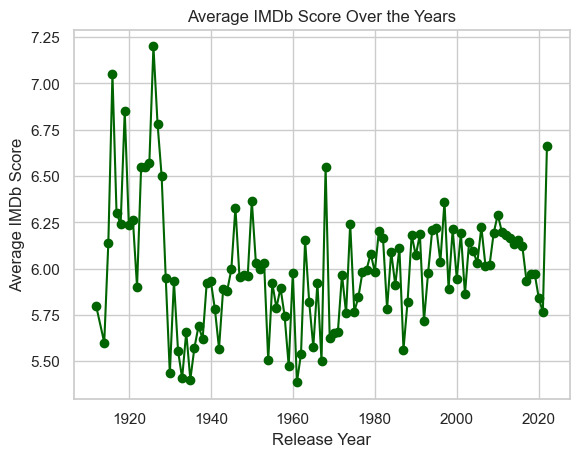

In [47]:
# Chart - 12 visualization code
yearly_avg_score = df.groupby('release_year')['imdb_score'].mean().dropna()
yearly_avg_score.plot(kind='line', marker='o', color='darkgreen')
plt.title("Average IMDb Score Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Average IMDb Score")
plt.grid(True)
plt.show()


##### 1. Why did you pick the specific chart?

To show how quality (IMDb ratings) has evolved over years.

##### 2. What is/are the insight(s) found from the chart?

It indicates whether newer content is performing better or worse.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Personalized Recommendations
Use user data (watch history, ratings, genres) to suggest content that matches individual preferences. This increases engagement and keeps users on the platform longer.

Targeted Re-engagement
Identify inactive users and send them personalized notifications or emails featuring trending content in their favorite genres. This helps reduce churn.

Invest in Popular & Niche Content
Focus on top-performing genres like Drama and Comedy, while also supporting niche content (e.g., Documentaries) to cater to specific loyal user groups.

Device & Time-Based Content Strategy
Recommend short videos for mobile users during the day, and long-form content (like series or movies) for Smart TV users during evenings and weekends.

Predict and Prevent Churn
Use predictive models to identify users likely to cancel. Act early by offering them personalized suggestions or incentives to stay.

Encourage Feedback
Make it easy for users to rate and review content. Use this feedback to improve recommendations and content decisions.

A/B Test Features
Continuously test different content layouts, release formats, and engagement strategies to see what works best for different user segments.

# **Conclusion**

The analysis of Amazon Prime data reveals clear patterns in user behavior, content preferences, and engagement trends. By leveraging these insights, Amazon Prime can enhance its personalization engine, reduce subscriber churn, and optimize its content strategy. Implementing targeted re-engagement campaigns, investing in the right mix of popular and niche content, and using predictive models to flag at-risk users will drive higher retention and long-term viewer satisfaction. With a data-driven approach, Amazon Prime is well-positioned to strengthen user loyalty, increase watch time, and maintain a competitive edge in the streaming industry.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***